3259537
1266065
원 데이터 ADF Statistic: -25.377
원 데이터 p-value: 0.000


C:\Users\jsm97\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\jsm97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jsm97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jsm97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                19500
Model:                     ARMA(2, 2)   Log Likelihood              144897.084
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 24 Aug 2020   AIC                        -289782.168
Time:                        18:11:24   BIC                        -289734.899
Sample:                             0   HQIC                       -289766.684
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004   1.79e-06    208.101      0.000       0.000       0.000
ar.L1.y        0.7104        nan        nan        nan         nan         nan
ar.L2.y        0.0897      0.050      1.777      0.0

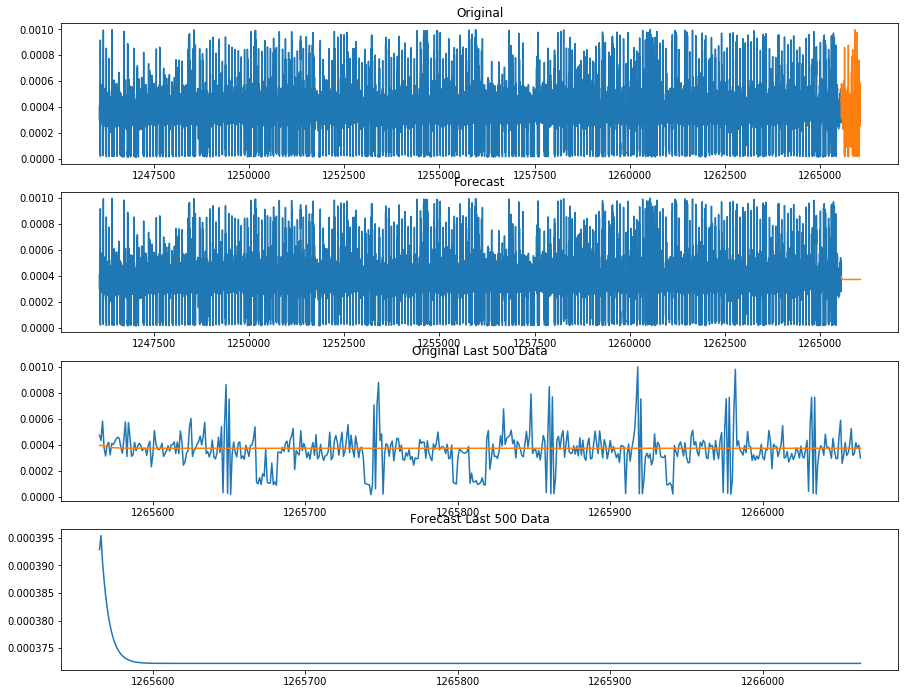

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import time

def main():
    data = pd.read_csv("C:/Users/jsm97/Desktop/raw193.csv")
    data = data.copy()
    data = data[data['block_rq_complete']!=0]
    data = data[data['nvme_sq']!=0]
    print(len(data))
    data = data['block_rq_complete']-data['nvme_sq']

    data = data[data<0.001]
    data = data.reset_index(drop=True)
    
    total=len(data)
    print(total)
    data1=data[total-20000:total-500]

    # P-value Check
    #start = time.time()
    result = adfuller(data1)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    #data1 = data1.diff().dropna()
    #reslut = adfuller(data1)
    #print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    #print(f'1차 차분 p-value: {result[1]:.3f}')

    #print("time : ",time.time()-start)
    
    # ARIMA Parameter Select
#    list_arima = my_auto_arima(data1, [3,3,3])
#    print(list_arima)

    # ARIMA Model
    model = ARIMA(data1, order=(2,0,2))
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=500)[0]
    #forecast = model_fit.predict(start= 0,end = 500)
    forecast = pd.DataFrame(forecast)
    forecast.index=range(total-500,total)
    print(forecast)
    test_data = data[total-500:]
    print(test_data)
    test_data1 = data[total-20000:total-19500]
    
    # plot
    plt.figure(figsize=(15,15))
    plt.subplot(5,1,1)
    plt.title("Original")
    plt.plot(data1)
    plt.plot(test_data)
    plt.subplot(5,1,2)
    plt.title("Forecast")
    plt.plot(data1)
    plt.plot(forecast)
    plt.subplot(5,1,3)
    plt.title("Original Last 500 Data")
    plt.plot(test_data)
    plt.plot(forecast)
    plt.subplot(5,1,4)
    plt.title("Forecast Last 500 Data")
    plt.plot(forecast)
    #plt.subplot(5,1,5)
    #plt.plot(test_data1)
    #plt.plot(forecast)

    # mae
    forecast = np.array(forecast).reshape(-1,1)
    test_data = np.array(test_data).reshape(-1,1)
    error_mean = np.mean(np.abs(test_data - forecast), axis=0)
    print(error_mean)

def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df
main()
